In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



%matplotlib inline

In [2]:
df = pd.read_csv('E:/Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Датафрейм после обработки PCA.Имеются некоторые аномалии.Задача-проверить фрейм несколькими алгоритмами
### на предмет определения аномалий и сравнить результаты.
### Time - время в секундах между первой и этой транзакцией
### Class - доля аномалий,м.б. мошеннических транзакций. 1 - да, 0 - нет
### Amount - сумма транзакции

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Проверю аргумент Class - уровень "загрязнённости", доля подозрительных транзакций,кот. могут быть мошенническими

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

### Доля аномалий - ок. 0.2%. 

### Построю гистограммы,heatmap,boxplots

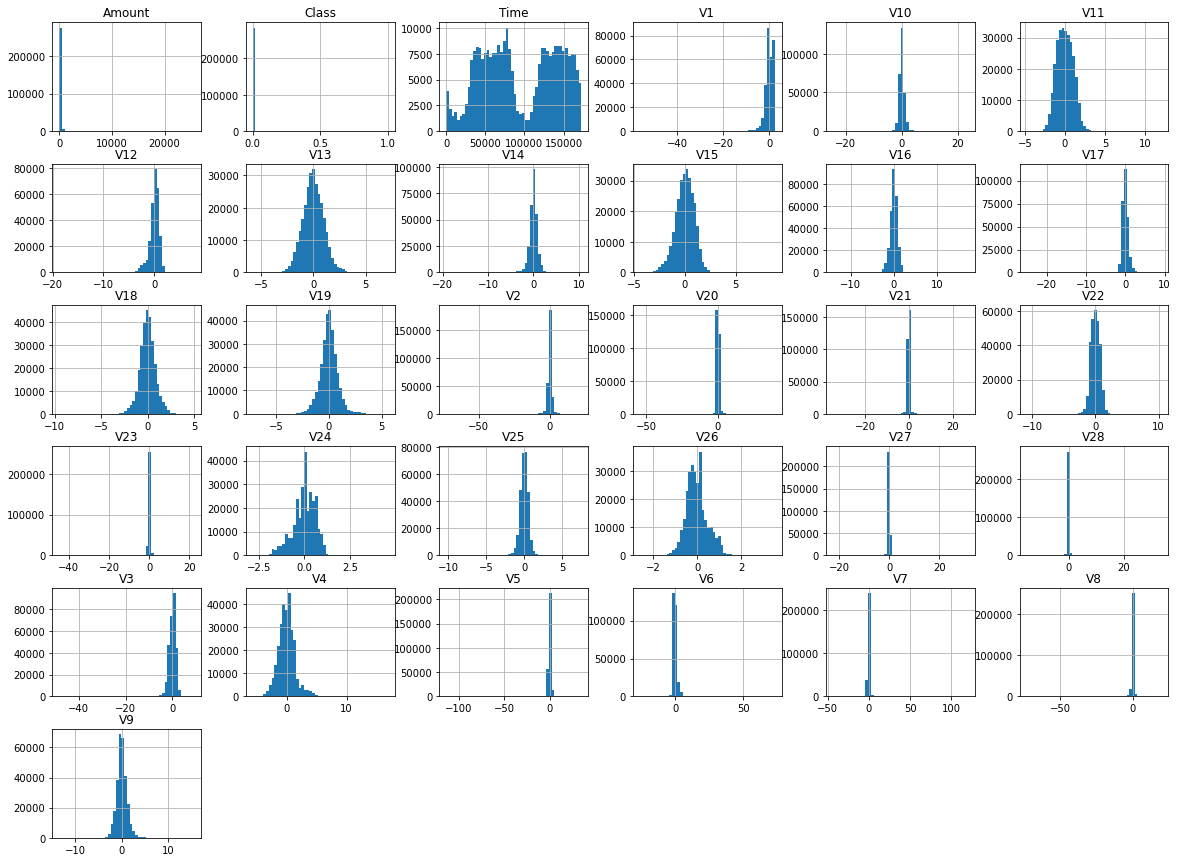

In [10]:
df.hist(bins=50,figsize=(20,15))
plt.show()

#### Рассчитаем корреляцию и построим heatmap

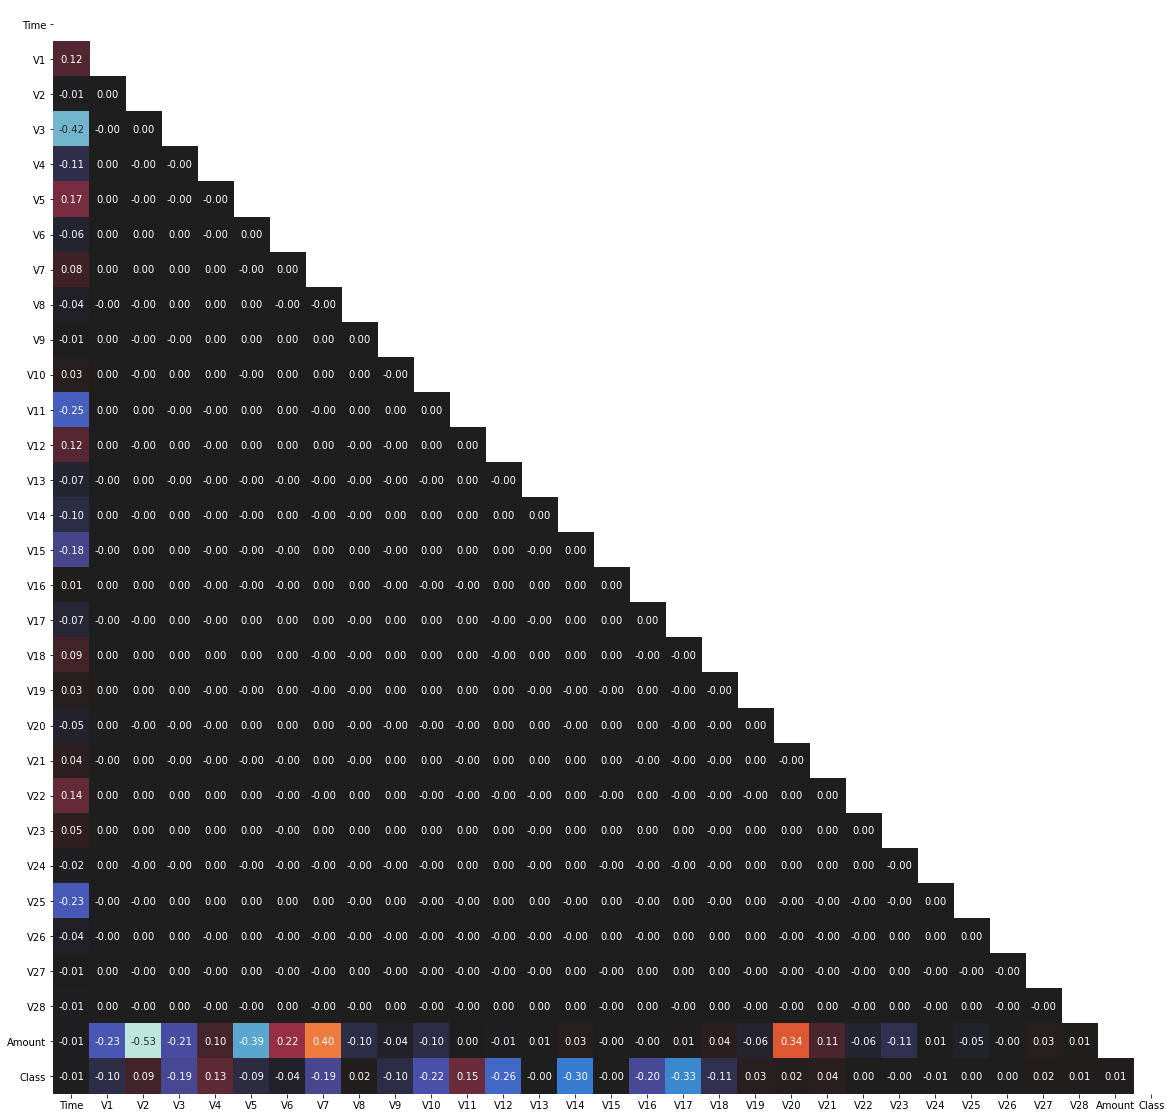

In [11]:
plt.figure(figsize=(20,20))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

#### Наблюдается небольшая отриц. и полож. корреляция некоторых счетов с аргументом Class
#### Видимо, на них и наблюдаются аномалии

In [12]:
df1 = df.drop(['Time', 'Amount', 'Class'], axis = 1)

Text(0.5, 1.0, 'Boxplots')

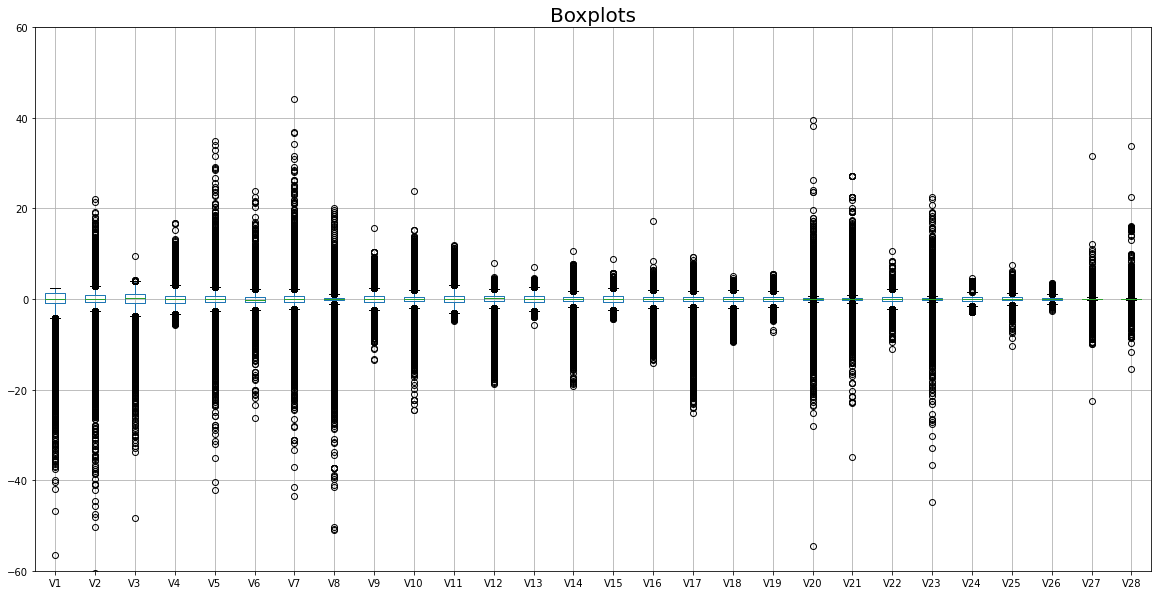

In [13]:
df1.boxplot(figsize = (20,10))
plt.ylim(-60,60)
plt.title('Boxplots',fontsize = 20)

### Видно,что все транзакции в основном небольшие,и везде присутствуют выбросы. Это видно и по гистограммам и по boxplot'ам.
### Оценим их с помощью разных алгоритмов

### Метод 3х сигм

In [14]:
def outlier_std(df, col, threshold=3):
    mean = df[col].mean()
    std = df[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([df[col]>up_bound, df[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [15]:
def get_column_outliers(df, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = df.columns
        
    outliers = pd.Series(data=[False]*len(df), index=df_feat.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(df, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [16]:
df_feat = df.iloc[:, :-1]

In [17]:
comparison_table, std_outliers = get_column_outliers(df_feat)
anomalies_report(std_outliers)

Total number of outliers: 37816
Percentage of outliers:   13.28%


##### Показал 13.28%. Видимо потому,что большинство аргументов не нормально распределены

### Межквартильное отклонение

In [18]:
def outlier_iqr(df, col, threshold=3):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    up_bound = df[col].quantile(0.75) + (IQR * threshold)
    low_bound = df[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([df[col]>up_bound, df[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [19]:
comparison_table, iqr_outliers = get_column_outliers(df_feat, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 53336
Percentage of outliers:   18.73%


##### Значение 18.73%. Поскольку на IQR не сильно влияет нормальность распределения,значит просто во фрейме много данных,
##### кот. не обязательно являются аномалиями. Что и видно по боксплотам.Изменю значения квартилей,посмотрим,что получится

In [20]:
def outlier_iqr(df, col, threshold=3):
    IQR = df[col].quantile(0.9) - df[col].quantile(0.1)
    up_bound = df[col].quantile(0.9) + (IQR * threshold)
    low_bound = df[col].quantile(0.1) - (IQR * threshold)
    anomalies = pd.concat([df[col]>up_bound, df[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [21]:
comparison_table, iqr_outliers = get_column_outliers(df_feat, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 13006
Percentage of outliers:   4.57%


##### Ожидаемо значение уменьшилось,но всё равно далеко от заданного 

# Кластеризация

## <center> Distance-based</center> 

In [22]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
class DistanceOutliers(BaseEstimator):     
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

##### Поскольку всё строится на расстояниях,отшкалируем данные

In [24]:
scaler = RobustScaler()
scaled_df = pd.DataFrame(
    data=scaler.fit_transform(df_feat), 
    columns=df_feat.columns
)

In [63]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(scaled_df)
euclidian_outliers = euclidian_model.predict(scaled_df)
anomalies_report(euclidian_outliers)

Total number of outliers: 28481
Percentage of outliers:   10.00%


##### Уменьшаю датафрейм для визуализации

In [26]:

df_1 = df.sample(frac=0.05)

In [27]:

df_1.shape

(14240, 31)

In [28]:
df_1['Class'].value_counts()

0    14214
1       26
Name: Class, dtype: int64

In [29]:
df_1['Class'].value_counts(normalize=True)

0    0.998174
1    0.001826
Name: Class, dtype: float64

##### Видим,что фрейм уменьшился пропорционально основному

##### Отшкалирую уменьшенный фрейм

In [30]:
df_feat_1 = df_1.iloc[:, :-1]

In [31]:
scaler = RobustScaler()
scaled_df_1 = pd.DataFrame(
    data=scaler.fit_transform(df_feat_1), 
    columns=df_feat.columns
)

In [32]:
scaled_df_1.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.294715,0.572857,-0.337738,0.291449,-0.505028,-0.810053,-0.307775,-0.574169,-0.031622,1.605903,...,-0.200896,-0.017461,0.117550,-0.223136,-0.015247,0.806383,-1.125593,0.574076,0.157779,-0.280872
1,-0.016323,-0.163735,-0.358038,0.415823,-1.338848,-0.251820,-0.186782,-0.077460,-1.071403,-1.639285,...,-0.753374,-0.316320,0.150869,0.126400,-0.622501,-0.897375,-0.560931,-2.035720,-0.203603,-0.014321


##### Для визуализации использую алгоритмы TSNE и UMAP

### TSNE

In [57]:
from sklearn.manifold import TSNE

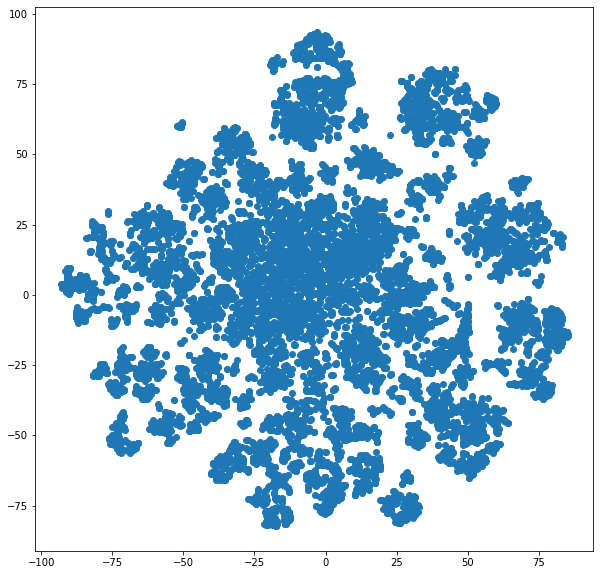

In [61]:
tsne = TSNE(perplexity=30, n_jobs=-1)
tsne_tr = tsne.fit_transform(scaled_df_1)

plt.figure(figsize=(10, 10))
plt.scatter(tsne_tr[:, 0], tsne_tr[:, 1]);

In [65]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(scaled_df_1)
euclidian_outliers = euclidian_model.predict(scaled_df_1)
anomalies_report(euclidian_outliers)

Total number of outliers: 1424
Percentage of outliers:   10.00%


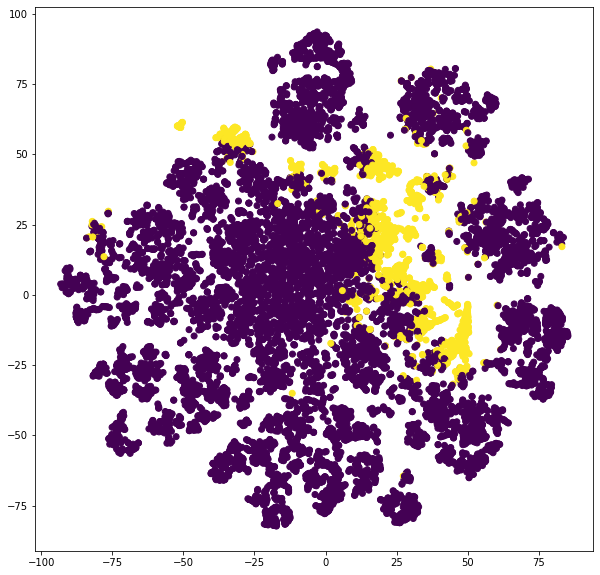

In [66]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_tr[:, 0], tsne_tr[:, 1], c=euclidian_outliers);

### UMAP

In [45]:
import umap

In [46]:
umap = umap.UMAP().fit_transform(scaled_df_1)

In [47]:
umap.shape

(14240, 2)

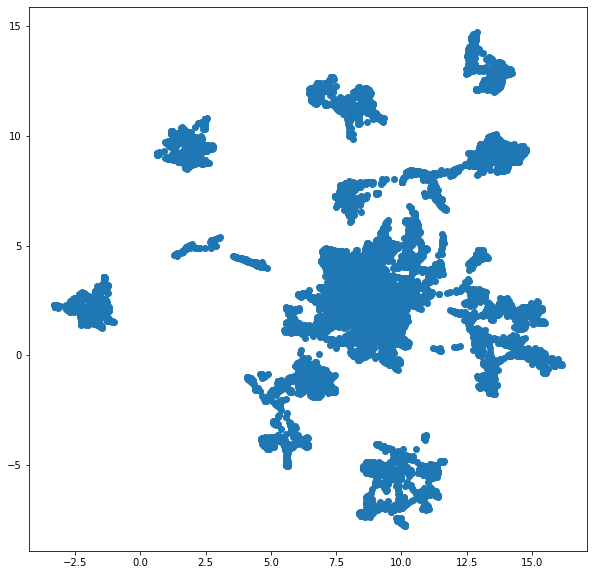

In [59]:
plt.figure(figsize=(10, 10))
plt.scatter(umap[:, 0], umap[:, 1]);

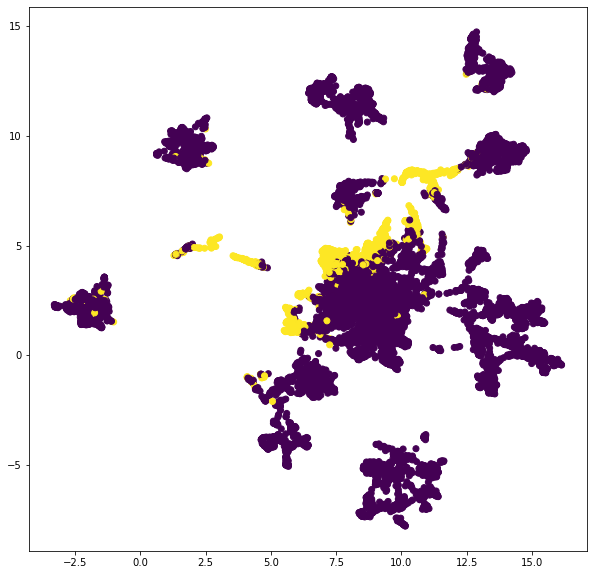

In [67]:
plt.figure(figsize=(10, 10))
plt.scatter(umap[:, 0], umap[:, 1], c=euclidian_outliers);

##### UMAP более наглядно показал наличие выбросов,чем TSNE. Кажется,что выбросы находятся в общей группе,
##### но это произошло из-за сокращения размерности

### DBSCAN

##### DBSCAN очень чувствителен к настройкам.А с подборами настроек данный фрейм очень долго обрабатывается,
##### поэтому DBSCAN я тоже прогоню на урезанном фрейме,поскольку общая картина не изменится

In [68]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:    
    model = DBSCAN(eps=eps, n_jobs=-1).fit(scaled_df_1)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps, n_jobs=-1)
model.fit(scaled_df_1)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [69]:
anomalies_report(density_outlier)

Total number of outliers: 1323
Percentage of outliers:   9.29%


##### DBSCAN дал чуть лучше результат предыдущих алгоритмов,но не намного
##### Посмотрим,как сработает One-Class SVM

### One-Class SVM

In [80]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.1, gamma='auto')
one_class_svm.fit(scaled_df)
svm_outliers = one_class_svm.predict(scaled_df)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [81]:
anomalies_report(svm_outliers)

Total number of outliers: 28484
Percentage of outliers:   10.00%


##### Посчитаем accuracy

In [105]:
svm_acc = accuracy_score(df['Class'], svm_outliers)
print(svm_acc)

0.9013577615718715


##### confusion_matrix

In [106]:
svm_conf = confusion_matrix(df['Class'], svm_outliers)
svm_conf
svm_df = pd.DataFrame(data = svm_conf, columns = [['Pred: Legit', 'Pred: Fraud']], index = [['Act: Legit', 'Act: Fraud']])
svm_df

,Pred: Legit,Pred: Fraud
Act: Legit,256272,28043
Act: Fraud,51,441


In [108]:
svm_fraud_acc = 441/(441 + 51)
svm_fraud_acc

0.8963414634146342

### IsolationForest

In [53]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, 
                                   max_features=1.0, bootstrap=True, behaviour="new")
isolation_forest.fit(scaled_df)

isolation_outliers = isolation_forest.predict(scaled_df)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [54]:
anomalies_report(isolation_outliers)

Total number of outliers: 28481
Percentage of outliers:   10.00%


##### accuracy

In [101]:
if_acc = accuracy_score(df['Class'], isolation_outliers)
print(if_acc)

0.9012770051297897


##### confusion_matrix

In [102]:
if_conf = confusion_matrix(df['Class'], isolation_outliers)
if_conf
if_df = pd.DataFrame(data = if_conf, columns = [['Pred: Legit', 'Pred: Fraud']], index = [['Act: Legit', 'Act: Fraud']])
if_df

,Pred: Legit,Pred: Fraud
Act: Legit,256262,28053
Act: Fraud,64,428


In [104]:
if_fraud_acc = 4288/(4288 + 38)
if_fraud_acc

0.9912159038372631

##### Видно,что IsolationForest дал лучшие результаты,чем One-Class SVM.Думаю потому,что One-Class SVM требуются более тонкие настройки


## Выводы

##### 1. Методы 3х сигм и межквартильного отклонения показали не очень хорошие результаты.
#####   Думаю потому,что у большинства аргументов не нормальное и нелинейное распределение

##### 2. Остальные алгоритмы сработали примерно одинаково,DBSCAN чуть лучше других определил количество выбросов.
#####   А IsolationForest показал высокий уровень accuracy. Деревья хорошо работают с выбросами

##### 3. Найденное количество выбросов сильно отличается от показателя 'Class'
##### Думаю,что дело не в настройках алгоритмов,хотя они,конечно,важны.Слишком большой разрыв в показателях.
##### Скорее всего для определения мошенничества в транзакциях используются дополнительные алгоритмы.